In [8]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet
from three_layer_net import ThreeLayerNet

(x_train, t_train), (x_test, t_test) = \
                    load_mnist(normalize=True, one_hot_label=True)

network2 = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000    #배치 반복수  
train_size = x_train.shape[0]
batch_size = 200     #미니배치 크기
learning_rate = 0.15 #학습률

#epoch당 배치 반복수 = 300, epoch당 60000개
#epoch수 34 = 2,000,000/ 60,000 
iter_per_epoch = max(train_size / batch_size, 1) 

train_loss_list2 ,train_acc_list2 ,test_acc_list2 = [],[],[]

for i in range(iters_num):
    #미니배치
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #기울기 계산
    grad2 = network2.gradient(x_batch, t_batch)
    
    #가중치, 편향 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network2.params[key] -= learning_rate * grad2[key]
    
    #CEE 손실 계산
    loss2 = network2.loss(x_batch, t_batch)
    train_loss_list2.append(loss2)

    #적중율 계산
    if i % iter_per_epoch == 0:
        train_acc2 = network2.accuracy(x_train, t_train)
        test_acc2 = network2.accuracy(x_test, t_test)
        train_acc_list2.append(train_acc2)
        test_acc_list2.append(test_acc2)
        print("TwoLayer",train_acc2, test_acc2)
"""
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network2 = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
network3 = ThreeLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 200
learning_rate = 0.15

train_loss_list2 = []
train_acc_list2 = []
test_acc_list2 = []
train_loss_list3 = []
train_acc_list3 = []
test_acc_list3 = []


iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad2 = network2.gradient(x_batch, t_batch)
    grad3 = network3.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network2.params[key] -= learning_rate * grad2[key]
        
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network3.params[key] -= learning_rate * grad3[key]
    
    loss2 = network2.loss(x_batch, t_batch)
    loss3 = network3.loss(x_batch, t_batch)
    train_loss_list2.append(loss2)
    train_loss_list3.append(loss3)
    
    if i % iter_per_epoch == 0:
        train_acc2 = network2.accuracy(x_train, t_train)
        test_acc2 = network2.accuracy(x_test, t_test)
        train_acc_list2.append(train_acc2)
        test_acc_list2.append(test_acc2)
        
        train_acc3 = network3.accuracy(x_train, t_train)
        test_acc3 = network3.accuracy(x_test, t_test)
        train_acc_list3.append(train_acc3)
        test_acc_list3.append(test_acc3)
        print("TwoLayer",train_acc2, test_acc2,",  ThreeLayer",train_acc3, test_acc3)"""
        

print("done")

TwoLayer 0.14451666666666665 0.1463
TwoLayer 0.89865 0.9011
TwoLayer 0.9161833333333333 0.921
TwoLayer 0.9252333333333334 0.9276
TwoLayer 0.93545 0.9366
TwoLayer 0.94085 0.9395
TwoLayer 0.9465333333333333 0.9455
TwoLayer 0.9514666666666667 0.9483
TwoLayer 0.9558166666666666 0.9523
TwoLayer 0.9576833333333333 0.9546
TwoLayer 0.9619166666666666 0.9574
TwoLayer 0.9630333333333333 0.9591
TwoLayer 0.9647333333333333 0.9592
TwoLayer 0.9683166666666667 0.9623
TwoLayer 0.9697333333333333 0.9631
TwoLayer 0.9711 0.9644
TwoLayer 0.9715666666666667 0.964
TwoLayer 0.9739666666666666 0.9652
TwoLayer 0.97455 0.9657
TwoLayer 0.9763 0.9667
TwoLayer 0.9770333333333333 0.9672
TwoLayer 0.9786 0.9689
TwoLayer 0.9785166666666667 0.97
TwoLayer 0.9793833333333334 0.9696
TwoLayer 0.9808 0.9694
TwoLayer 0.9813 0.9701
TwoLayer 0.9816166666666667 0.9695
TwoLayer 0.9831166666666666 0.9708
TwoLayer 0.9826666666666667 0.9719
TwoLayer 0.9828 0.97
TwoLayer 0.9837333333333333 0.9719
TwoLayer 0.98465 0.9723
TwoLayer 0.9

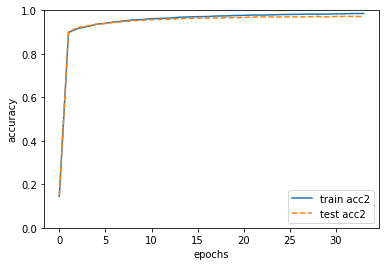

'\nmarkers = {\'train\': \'o\', \'test\': \'s\'}\nx = np.arange(len(train_acc_list2))\nplt.plot(x, train_acc_list2, label=\'train acc2\')\nplt.plot(x, test_acc_list2, label=\'test acc2\', linestyle=\'--\')\nplt.plot(x, train_acc_list3, label=\'train acc3\')\nplt.plot(x, test_acc_list3, label=\'test acc3\', linestyle=\'--\')\nplt.xlabel("epochs")\nplt.ylabel("accuracy")\nplt.ylim(0.95, 1.0)\nplt.legend(loc=\'lower right\')\nplt.show()\n'

In [9]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list2))
plt.plot(x, train_acc_list2, label='train acc2')
plt.plot(x, test_acc_list2, label='test acc2', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0., 1.0)
plt.legend(loc='lower right')
plt.show()

"""
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list2))
plt.plot(x, train_acc_list2, label='train acc2')
plt.plot(x, test_acc_list2, label='test acc2', linestyle='--')
plt.plot(x, train_acc_list3, label='train acc3')
plt.plot(x, test_acc_list3, label='test acc3', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.95, 1.0)
plt.legend(loc='lower right')
plt.show()
"""